In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 27, Finished, Available, Finished)

In [26]:
# Step 1: Load the CSV file and inspect raw data
data = pd.read_csv("/lakehouse/default/Files/Assignment/historical_data.csv", header=None)

# Print the first few rows to inspect the structure
print(data.head())

# Step 2: Assign column names
data.columns = ['TimeStamp', 'Open', 'High', 'Low', 'Close', 'Volume']

# Step 3: Parse the 'TimeStamp' column as datetime and set it as the index
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data.set_index('TimeStamp', inplace=True)

# Print the first few rows with proper columns
print(data.head())


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 28, Finished, Available, Finished)

                     0         1         2         3         4         5
0  2022-01-01 00:00:00  46216.93  46271.08  46208.37  46250.00  40.57574
1  2022-01-01 00:01:00  46250.00  46344.23  46234.39  46312.76  42.38106
2  2022-01-01 00:02:00  46312.76  46381.69  46292.75  46368.73  51.29955
3  2022-01-01 00:03:00  46368.73  46391.49  46314.26  46331.08  30.45894
4  2022-01-01 00:04:00  46331.07  46336.10  46300.00  46321.34  20.96029
                         Open      High       Low     Close    Volume
TimeStamp                                                            
2022-01-01 00:00:00  46216.93  46271.08  46208.37  46250.00  40.57574
2022-01-01 00:01:00  46250.00  46344.23  46234.39  46312.76  42.38106
2022-01-01 00:02:00  46312.76  46381.69  46292.75  46368.73  51.29955
2022-01-01 00:03:00  46368.73  46391.49  46314.26  46331.08  30.45894
2022-01-01 00:04:00  46331.07  46336.10  46300.00  46321.34  20.96029


In [27]:
# Step 2: Resample to H1 time frame
data_h1 = data.resample('1H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 29, Finished, Available, Finished)

In [28]:
# Step 3: Calculate percentage change and target class
data_h1['Future_Close'] = data_h1['Close'].shift(-10)
data_h1['Pct_Change'] = ((data_h1['Future_Close'] - data_h1['Close']) / data_h1['Close']) * 100


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 30, Finished, Available, Finished)

In [29]:
# Define categories based on Pct_Change
def categorize_change(change):
    if change < -5:
        return 'A'
    elif -5 <= change < -2:
        return 'B'
    elif -2 <= change <= 2:
        return 'C'
    elif 2 < change <= 5:
        return 'D'
    else:
        return 'E'

data_h1['Target'] = data_h1['Pct_Change'].apply(categorize_change)


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 31, Finished, Available, Finished)

In [30]:
# Drop rows with NaN values in the target column
data_h1 = data_h1.dropna(subset=['Target'])


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 32, Finished, Available, Finished)

In [31]:
# Step 4: Prepare data for model
X = data_h1[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data_h1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 33, Finished, Available, Finished)

In [32]:
# Step 5: Train a model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 34, Finished, Available, Finished)

RandomForestClassifier(random_state=42)

In [33]:
# Predict and evaluate
y_pred = model.predict(X_test)


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 35, Finished, Available, Finished)

StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 36, Finished, Available, Finished)

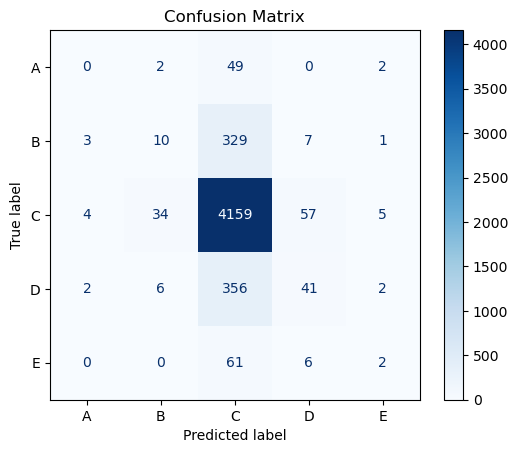

In [34]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D', 'E'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D', 'E'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Step 6: Save the processed data
data_h1.to_csv('processed_h1_data_with_target.csv')
print("Processed data saved to 'processed_h1_data_with_target.csv'")


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 37, Finished, Available, Finished)

Processed data saved to 'processed_h1_data_with_target.csv'


In [36]:
file_path = os.path.abspath('processed_h1_data_with_target.csv')
print(f"The file is saved at: {file_path}")

StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 38, Finished, Available, Finished)

The file is saved at: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1736330784449_0001/container_1736330784449_0001_01_000001/processed_h1_data_with_target.csv


In [37]:
df1=spark.createDataFrame(data_h1)


StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 39, Finished, Available, Finished)

In [38]:
display(df1)

StatementMeta(, 5755774b-c003-4634-a2d6-877b1d2284a4, 40, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 40b98d7f-6bf2-4e0a-b78f-58e928587575)